# AI Project

## 1. Libraries, Imports, and Installations

#### All installations are provided below, only install if needed

#### All the libraries are imported and all of their uses are listed
<ul>
    <li><b>requests:</b> library to handle requests</li>
    <li><b>pandas:</b> library for data analysis</li>
<li><b>numpy:</b> library to handle datd in a vectorized manner</li>    
<li><b>random:</b> library used to generate random numbers</li>
<li><b>Nominatim imported from geopy.geocoders:</b> module to get longitude and latitude values</li>    
<li><b>IPython.display and IPython.core.display:</b> Both are used for diplay</li>
<li><b>json_normalize imported from pandas.io.json:</b> Library to trandom json file to a pandas dataframe</li>
<li><b>folium:</b> Library to plot data on map</li>    
<li><b>BeautifulSoup imported from bs4:</b> library to get data from webpage</li> 
<li><b>KMeans imported from sklear.cluster:</b> Used for clustering of information</li>
</ul>    

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html

import json
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup as bs
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

#Used for plotting data on graphs
import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## 2. Gathering Neighbourhood Data
### In this step data from other sources will be gathered and merged into one dataframe

#### Webpage with postal codes of neighborhoods is scraped

In [3]:
#Webpage is taken using requests
source = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050').text

#html of webpages is parsed
soup = bs(source,'html.parser')

#html is saved into tab
tab = str(soup.table)
display_html(tab,raw=True)

Postcode,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Downtown Toronto,Queen's Park
M8A,Not assigned,Not assigned
M9A,Etobicoke,Islington Avenue


#### The data from the webpage is then put into a dataframe

In [4]:
# html is read and formated using pandas library
dfs = pd.read_html(tab)
df=dfs[0]
df.head(2000)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,Islington Avenue


#### The dataframe is then cleaned up and processed

In [5]:
# Dropping the rows where Borough is 'Not assigned'
df1 = df[df.Borough != 'Not assigned']

# Combining the neighbourhoods with same Postalcode
df2 = df1.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

# Dataframe is displayed
df2.head(200)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


#### CSV file with latitudes and longitudes associated with neighborhood postal codes are imported

In [6]:
# csv file is read saved
lat_lng = pd.read_csv("Geospatial_Coordinates.csv")
lat_lng.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### The latitude and longitudes are added to a dataframe

In [7]:
# Column name Postal Code in csv file is change to postcode for merging
lat_lng.rename(columns={'Postal Code':'Postcode'},inplace=True)

#Dataframe is created using the Postal Codes as a means to merge as they are common among both dataframes
df3 = pd.merge(df2,lat_lng,on='Postcode')
df3.head(200)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


#### The neighbourhoods are plotted onto a map for visualization using folium 

In [8]:
# map is intialized using the appropriate parameters
map_PC = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# The necessary data values are taken using a for loop via their column names
for lat,lng,neighbourhood in zip(df3['Latitude'],df3['Longitude'],df3['Neighbourhood']):
    
    # Each neighbourhood is plotted onto the map
    label = folium.Popup(' Neighborhood ' + str(neighbourhood), parse_html=True)
    folium.Circle(
        [lat,lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_PC)

# Map is displayed    
map_PC    

## 3. More Data Gathered and Merged

#### CSV file with neighbourhood crime rates is imported

In [9]:
# csv file is read and put into dataframe
crime_rates = pd.read_csv("Neighbourhood_Crime_Rates_(Boundary_File)_.csv")

# Data frame is displayed
crime_rates.head(200)

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,12528,20,29,39,27,34,37,31.0,0.09,295.3,2,3,7,2,6,6,4.3,0.00,47.9,37,20,12,19,24,28,23.3,0.17,223.5,0,0,0,0,0,0,0.0,0.00,0.0,6,5,6,8,5,4,5.7,-0.20,31.9,4,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,2,York University Heights,27,27593,271,296,361,344,357,370,333.2,0.04,1340.9,105,100,105,92,92,144,106.3,0.57,521.9,107,139,98,105,122,108,113.2,-0.11,391.4,1,0,2,1,1,0,0.8,-1.00,0.0,59,84,70,75,88,79,75.8,-0.10,286.3,30,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,3,Lansing-Westgate,38,16164,44,80,68,85,75,72,70.7,-0.04,445.4,19,22,27,26,16,32,23.7,1.00,198.0,34,27,41,42,50,39,38.8,-0.22,241.3,0,0,0,0,10,0,1.7,-1.00,0.0,11,5,9,17,35,11,14.7,-0.69,68.1,4,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
3,4,Yorkdale-Glen Park,31,14804,106,136,174,161,175,209,160.2,0.19,1411.8,63,53,41,52,63,61,55.5,-0.03,412.1,51,57,66,58,64,84,63.3,0.31,567.4,1,1,1,1,2,1,1.2,-0.50,6.8,23,21,24,35,44,42,31.5,-0.05,283.7,23,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
4,5,Stonegate-Queensway,16,25051,88,71,76,95,87,82,83.2,-0.06,327.3,34,29,12,32,31,34,28.7,0.10,135.7,71,45,49,49,39,64,52.8,0.64,255.5,0,0,0,0,0,0,0.0,0.00,0.0,21,14,16,26,25,22,20.7,-0.12,87.8,7,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878
5,6,Tam O'Shanter-Sullivan,118,27446,106,90,98,124,133,107,109.7,-0.20,389.9,22,19,22,18,32,25,23.0,-0.22,91.1,49,68,61,54,77,67,62.7,-0.13,244.1,0,1,0,0,1,2,0.7,1.00,7.3,28,39,24,27,18,30,27.7,0.67,109.3,4,6,9,8,3,3,5.5,0.00,10.9,5.422345e+06,10750.468125
6,7,The Beaches,63,21567,83,108,86,111,94,81,93.8,-0.14,375.6,8,23,7,10,30,20,16.3,-0.33,92.7,44,42,77,33,43,57,49.3,0.33,264.3,0,0,0,0,0,0,0.0,0.00,0.0,15,14,19,48,10,16,20.3,0.60,74.2,8,5,3,7,5,9,6.2,0.80,41.7,3.595829e+06,11275.180743
7,8,Thistletown-Beaumond Heights,3,10360,56,52,39,51,50,74,53.7,0.48,714.3,10,14,13,23,42,50,25.3,0.19,482.6,22,23,23,17,16,13,19.0,-0.19,125.5,0,0,0,0,2,0,0.3,-1.00,0.0,17,21,16,20,9,7,15.0,-0.22,67.6,1,3,1,4,2,3,2.3,0.50,29.0,3.339481e+06,10828.444477
8,9,Thorncliffe Park,55,21108,86,105,87,99,93,115,97.5,0.24,544.8,12,11,4,7,9,13,9.3,0.44,61.6,33,27,24,19,23,27,25.5,0.17,127.9,3,1,1,4,0,0,1.5,0.00,0.0,16,7,16,9,5,13,11.0,1.60,61.6,9,6,11,9,3,5,7.2,0.67,23.7,3.126554e+06,7502.709430
9,10,Danforth East York,59,17180,64,50,44,74,80,83,65.8,0.04,483.1,6,7,12,10,12,9,9.3,-0.25,52.4,31,22,43,25,18,24,27.2,0.33,139.7,0,0,0,0,0,0,0.0,0.00,0.0,2,6,5,8,8,6,5.8,-0.25,34.9,1,3,4,0,2,7,2.8,2.50,40.7,2.188598e+06,7623.857816


#### Merging crime rates with the existing dataframe using neighbourhood

In [10]:
# Dataframe is merged with existing using Neighbourhood
df4 = pd.merge(df3,crime_rates,on='Neighbourhood')
df4.head(50)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,OBJECTID,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_AVG,Assault_CHG,Assault_Rate_2019,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_AVG,AutoTheft_CHG,AutoTheft_Rate_2019,BreakandEnter_2014,BreakandEnter_2015,BreakandEnter_2016,BreakandEnter_2017,BreakandEnter_2018,BreakandEnter_2019,BreakandEnter_AVG,BreakandEnter_CHG,BreakandEnter_Rate_2019,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_AVG,Homicide_CHG,Homicide_Rate_2019,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,Robbery_2018,Robbery_2019,Robbery_AVG,Robbery_CHG,Robbery_Rate_2019,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,M4A,North York,Victoria Village,43.725882,-79.315572,39,43,17510,118,138,133,83,112,132,119.3,0.18,753.9,20,14,20,14,13,18,16.5,0.38,102.8,38,46,23,32,35,60,39.0,0.71,342.7,0,0,2,1,0,1,0.7,1.0,5.7,10,18,13,10,14,14,13.2,0.00,80.0,6,6,4,5,4,5,5.0,0.25,28.6,4.755219e+06,11800.341701
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,11,106,14365,43,52,52,38,47,46,46.3,-0.02,320.2,11,7,17,22,24,16,16.2,-0.33,111.4,31,39,27,39,33,26,32.5,-0.21,181.0,0,1,0,1,0,0,0.3,0.0,0.0,8,11,8,6,4,10,7.8,1.50,69.6,3,3,5,6,7,4,4.7,-0.43,27.8,1.871263e+06,6036.268116
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,7,63,21567,83,108,86,111,94,81,93.8,-0.14,375.6,8,23,7,10,30,20,16.3,-0.33,92.7,44,42,77,33,43,57,49.3,0.33,264.3,0,0,0,0,0,0,0.0,0.0,0.0,15,14,19,48,10,16,20.3,0.60,74.2,8,5,3,7,5,9,6.2,0.80,41.7,3.595829e+06,11275.180743
3,M1G,Scarborough,Woburn,43.770992,-79.216917,112,137,53485,352,395,365,400,369,427,384.7,0.16,798.4,46,33,31,47,59,60,46.0,0.02,112.2,120,146,80,86,99,100,105.2,0.01,187.0,3,3,1,0,0,0,1.2,0.0,0.0,84,89,67,120,74,67,83.5,-0.09,125.3,11,13,14,23,13,8,13.7,-0.38,15.0,1.233407e+07,18111.264992
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,62,48,16934,63,59,41,52,62,69,57.7,0.11,407.5,11,10,22,17,26,27,18.8,0.04,159.4,35,48,34,30,42,36,37.5,-0.14,212.6,0,0,0,0,0,1,0.2,1.0,5.9,16,6,15,26,16,16,15.8,0.00,94.5,7,5,2,4,7,6,5.2,-0.14,35.4,5.395666e+06,9570.813843
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,9,55,21108,86,105,87,99,93,115,97.5,0.24,544.8,12,11,4,7,9,13,9.3,0.44,61.6,33,27,24,19,23,27,25.5,0.17,127.9,3,1,1,4,0,0,1.5,0.0,0.0,16,7,16,9,5,13,11.0,1.60,61.6,9,6,11,9,3,5,7.2,0.67,23.7,3.126554e+06,7502.709430
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,15,139,16724,161,153,192,152,178,175,168.5,-0.02,1046.4,20,15,9,21,20,18,17.2,-0.10,107.6,49,48,34,32,45,40,41.3,-0.11,239.2,1,0,6,1,0,0,1.3,0.0,0.0,30,33,22,23,14,28,25.0,1.00,167.4,3,2,2,4,3,2,2.7,-0.33,12.0,3.151015e+06,7922.764442
7,M2K,North York,Bayview Village,43.786947,-79.385975,114,52,21396,79,104,84,67,60,66,76.7,0.10,308.5,27,14,14,22,9,37,20.5,3.11,172.9,47,34,33,40,50,37,40.2,-0.26,172.9,0,0,0,0,1,0,0.2,-1.0,0.0,9,4,13,7,6,14,8.8,1.33,65.4,10,8,5,7,7,13,8.3,0.86,60.8,5.159044e+06,9504.071991
8,M9L,North York,Humber Summit,43.756303,-79.565963,20,21,12416,76,89,118,116,109,118,104.3,0.08,950.4,66,42,62,83,106,135,82.3,0.27,1087.3,54,44,41,40,56,57,48.7,0.02,459.1,0,1,0,2,1,3,1.2,2.0,24.2,22,23,23,27,31,28,25.7,-0.10,225.5,15,16,18,18,15,22,17.3,0.47,177.2,7.966905e+06,12608.573118
9,M9N,York,Weston,43.706876,-79.518188,119,113,17992,180,157,192,190,167,196,180.3,0.17,1089.4,54,36,41,45,58,49,47.2,-0.16,272.3,33,55,44,75,38,58,50.5,0.53,322.4,1,0,4,1,1,2,1.5,1.0,11.1,37,50,47,45,42,26,41.2,-0.38,144.5,5,3,4,3,8,4,4.5,-0.50,22.2,2.565538e+06,10202.394229


#### Needed columns are chosen

In [11]:
# The needed columns are chosen
df5 = df4[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude', 'Population', 'Assault_AVG', 'AutoTheft_AVG', 'BreakandEnter_AVG', 'Homicide_AVG', 'Robbery_AVG', 'TheftOver_AVG', 'Shape__Area']]
df5

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Population,Assault_AVG,AutoTheft_AVG,BreakandEnter_AVG,Homicide_AVG,Robbery_AVG,TheftOver_AVG,Shape__Area
0,M4A,North York,Victoria Village,43.725882,-79.315572,17510,119.3,16.5,39.0,0.7,13.2,5.0,4.755219e+06
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,14365,46.3,16.2,32.5,0.3,7.8,4.7,1.871263e+06
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567,93.8,16.3,49.3,0.0,20.3,6.2,3.595829e+06
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485,384.7,46.0,105.2,1.2,83.5,13.7,1.233407e+07
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,16934,57.7,18.8,37.5,0.2,15.8,5.2,5.395666e+06
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,21108,97.5,9.3,25.5,1.5,11.0,7.2,3.126554e+06
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,16724,168.5,17.2,41.3,1.3,25.0,2.7,3.151015e+06
7,M2K,North York,Bayview Village,43.786947,-79.385975,21396,76.7,20.5,40.2,0.2,8.8,8.3,5.159044e+06
8,M9L,North York,Humber Summit,43.756303,-79.565963,12416,104.3,82.3,48.7,1.2,25.7,17.3,7.966905e+06
9,M9N,York,Weston,43.706876,-79.518188,17992,180.3,47.2,50.5,1.5,41.2,4.5,2.565538e+06


#### CSV file containing neighbourhood profiles is imported and saved as a dataframe

In [12]:
# csv file is read and saved to dataframe
n_profile = pd.read_csv("neighbourhood-profiles-2016-2.csv")
n_profile.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St.James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico,Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St.James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pellam Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designation,NIA,No Designation,

#### Neighbourhood profile data is merged with the existing dataframe using neighbourhood

In [13]:
# Dataframes are merged using neighbourhood
df7 = pd.merge(df5,n_profile,on='Neighbourhood')
df7

KeyError: 'Neighbourhood'

#### Needed columns are chosen

In [ ]:
# The needed columns are chosen
df8 = df7[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude', 'Population', '  Without employment income', 'Assault_AVG', 'Robbery_AVG', '  No certificate, diploma or degree']]
df8.columns = df8.columns.str.replace(' ', '_')
df8.head(20)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Population,__Without_employment_income,Assault_AVG,Robbery_AVG,"__No_certificate,_diploma_or_degree"
0,M4A,North York,Victoria Village,43.725882,-79.315572,17510,"5,385",119.3,13.2,2930
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,14365,"2,670",46.3,7.8,1125
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,21567,"4,085",93.8,20.3,1455
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485,"16,525",384.7,83.5,8850
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,16934,"6,135",57.7,15.8,1865
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,21108,"6,580",97.5,11.0,3195
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,16724,"5,035",168.5,25.0,2955
7,M2K,North York,Bayview Village,43.786947,-79.385975,21396,"6,215",76.7,8.8,1310
8,M9L,North York,Humber Summit,43.756303,-79.565963,12416,"4,165",104.3,25.7,3495
9,M9N,York,Weston,43.706876,-79.518188,17992,"5,020",180.3,41.2,3630


## 4. Foursquare

### In this step we will use Foursquare to gather information

The url provided by foursquare is used with the parameters of radius=25000, limit=50, and longitude and latitude are set to 43.651070 and 79.347015 respectively. Category is set to police stations

#### Recieved data from foursquare is then converted to JSON format

In [ ]:
#url provided foursquare
url = "https://api.foursquare.com/v3/places/search?ll=43.651070%2C-79.347015&radius=25000&categories=12072&limit=50"

#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}

#Saving the results to response
response = requests.request("GET", url, headers=headers)

#response is changed to json format and saved to results
results = response.json()

#results is outputted
results

{'results': [{'fsq_id': '4c56f1c06201e21e8419f76d',
   'categories': [{'id': 12072,
     'name': 'Police Station',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_policestation_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 1268,
   'geocodes': {'main': {'latitude': 43.65201, 'longitude': -79.362239},
    'roof': {'latitude': 43.65201, 'longitude': -79.362239}},
   'link': '/v3/places/4c56f1c06201e21e8419f76d',
   'location': {'address': '51 Parliament St',
    'country': 'CA',
    'cross_street': 'Front St. E',
    'formatted_address': '51 Parliament St (Front St. E), Toronto ON M5A 2Y5',
    'locality': 'Toronto',
    'postcode': 'M5A 2Y5',
    'region': 'ON'},
   'name': 'Toronto Police Service - 51 Division',
   'related_places': {},
   'timezone': 'America/Toronto'},
  {'fsq_id': '4b970a61f964a520d7f434e3',
   'categories': [{'id': 12072,
     'name': 'Police Station',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

#### JSON formatted data is converted to a dataframe

In [ ]:
#places contains the list of all info from results
stations = results['results']

#nomarlized so it can be used as a dataframe
dataframe = json_normalize(stations)

#datafame outputted
dataframe.head(300)

<ipython-input-16-24832c389f9c>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(stations)


,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.neighborhood,related_places.children,location.address_extended,location.po_box
0,4c56f1c06201e21e8419f76d,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],1268,/v3/places/4c56f1c06201e21e8419f76d,Toronto Police Service - 51 Division,America/Toronto,43.652010,-79.362239,43.652010,-79.362239,51 Parliament St,CA,Front St. E,"51 Parliament St (Front St. E), Toronto ON M5A...",Toronto,M5A 2Y5,ON,NaN,NaN,NaN,NaN
1,4b970a61f964a520d7f434e3,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],1753,/v3/places/4b970a61f964a520d7f434e3,Don Jail,America/Toronto,43.665973,-79.354682,43.665973,-79.354682,550 Gerrard St E,CA,at Broadview Ave,"550 Gerrard St E (at Broadview Ave), Toronto O...",Toronto,M4M 1X6,ON,[Riverdale],NaN,NaN,NaN
2,4bc0de81461576b0b6f07a32,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],3079,/v3/places/4bc0de81461576b0b6f07a32,Toronto Police Service - 55 Division,America/Toronto,43.668966,-79.317838,43.668966,-79.317838,101 Coxwell Ave,CA,at Dundas St. E,"101 Coxwell Ave (at Dundas St. E), Toronto ON ...",Toronto,M4L 3B3,ON,NaN,NaN,NaN,NaN
3,4bfd391ee529c928578fba8c,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],3243,/v3/places/4bfd391ee529c928578fba8c,Toronto Police Service - Headquarters,America/Toronto,43.661259,-79.384823,NaN,NaN,40 College St,CA,NaN,"40 College St, Toronto ON",Toronto,NaN,ON,NaN,"[{'fsq_id': '4ad4c05ef964a520dcf620e3', 'name'...",NaN,NaN
4,4b7383d8f964a52023b22de3,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],3418,/v3/places/4b7383d8f964a52023b22de3,Toronto Police Service - 52 Division,America/Toronto,43.654299,-79.389532,43.654299,-79.389532,255 Dundas St W,CA,NaN,"255 Dundas St W, Toronto ON M5T 2W5",Toronto,M5T 2W5,ON,NaN,NaN,NaN,NaN
5,4dcd5207922e8ac4247be29d,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],4617,/v3/places/4dcd5207922e8ac4247be29d,University of Toronto Campus Community Police,America/Toronto,43.664817,-79.400841,43.664817,-79.400841,21 Sussex Ave,CA,btwn Huron & St. George,"21 Sussex Ave (btwn Huron & St. George), Toron...",Toronto,M5S 1J6,ON,[Susex Ulster],NaN,NaN,NaN
6,5262e7b311d2f51f5791d2a7,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],4891,/v3/places/5262e7b311d2f51f5791d2a7,Toronto Police Service - Police Dog Svc,America/Toronto,43.696787,-79.354049,NaN,NaN,44 Beechwood Dr,CA,,"44 Beechwood Dr, Toronto ON M4K 3H8",Toronto,M4K 3H8,ON,[East York],NaN,NaN,NaN
7,4d8784779324236a34cef70e,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],5811,/v3/places/4d8784779324236a34cef70e,Toronto Police Service - Traffic Svc,America/Toronto,43.637598,-79.416969,43.637598,-79.416969,9 Hanna Ave,CA,Liberty Village,"9 Hanna Ave (Liberty Village), Toronto ON M6K 1W8",Toronto,M6K 1W8,ON,NaN,NaN,NaN,NaN
8,4ddd03cad4c082f960d32e47,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],6272,/v3/places/4ddd03cad4c082f960d32e47,Toronto Police Service - 14 Division Substation,America/Toronto,43.633697,-79.421206,43.633697,-79.421206,275 Manitoba Dr,CA,,"275 Manitoba Dr, Toronto ON",Toronto,,ON,NaN,NaN,NaN,NaN
9,4c03463c310fc9b6aac4c561,"[{'id': 12072, 'name': 'Police Station', 'icon...",[],6314,/v3/places/4c03463c310fc9b6aac4c561,14 Division Toronto Police CPLC,America/Toronto,43.651278,-79.425656,43.651278,-79.425656,350 Dovercourt Rd,CA,St Annes Road,"350 Dovercourt Rd (St Annes Road), Toronto ON ...",Toronto,M6J 3E3,ON,NaN,NaN,NaN,NaN


#### The dataframe is then filtered to only show the required information, in this case that would be the name, categories, longitude, latitude, distance, address, country, streets, locality, neighborhood, postal code, and region

In [ ]:
#Function to get the categories conatained in the dataframe
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Neccessary columns are chosen
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude', 'distance'] + [col for col in dataframe.columns if col.startswith('location')] + ['fsq_id']
nearby = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby['categories'] = nearby.apply(get_category_type, axis=1)

# clean columns
nearby.columns = [col.split('.')[-1] for col in nearby.columns]

#replce NaN values with Not found in address
nearby['neighborhood'] = nearby['neighborhood'].fillna("Not found")
nearby.head(50)   

,name,categories,latitude,longitude,distance,address,country,cross_street,formatted_address,locality,postcode,region,neighborhood,address_extended,po_box,fsq_id
0,Toronto Police Service - 51 Division,Police Station,43.652010,-79.362239,1268,51 Parliament St,CA,Front St. E,"51 Parliament St (Front St. E), Toronto ON M5A...",Toronto,M5A 2Y5,ON,Not found,NaN,NaN,4c56f1c06201e21e8419f76d
1,Don Jail,Police Station,43.665973,-79.354682,1753,550 Gerrard St E,CA,at Broadview Ave,"550 Gerrard St E (at Broadview Ave), Toronto O...",Toronto,M4M 1X6,ON,[Riverdale],NaN,NaN,4b970a61f964a520d7f434e3
2,Toronto Police Service - 55 Division,Police Station,43.668966,-79.317838,3079,101 Coxwell Ave,CA,at Dundas St. E,"101 Coxwell Ave (at Dundas St. E), Toronto ON ...",Toronto,M4L 3B3,ON,Not found,NaN,NaN,4bc0de81461576b0b6f07a32
3,Toronto Police Service - Headquarters,Police Station,43.661259,-79.384823,3243,40 College St,CA,NaN,"40 College St, Toronto ON",Toronto,NaN,ON,Not found,NaN,NaN,4bfd391ee529c928578fba8c
4,Toronto Police Service - 52 Division,Police Station,43.654299,-79.389532,3418,255 Dundas St W,CA,NaN,"255 Dundas St W, Toronto ON M5T 2W5",Toronto,M5T 2W5,ON,Not found,NaN,NaN,4b7383d8f964a52023b22de3
5,University of Toronto Campus Community Police,Police Station,43.664817,-79.400841,4617,21 Sussex Ave,CA,btwn Huron & St. George,"21 Sussex Ave (btwn Huron & St. George), Toron...",Toronto,M5S 1J6,ON,[Susex Ulster],NaN,NaN,4dcd5207922e8ac4247be29d
6,Toronto Police Service - Police Dog Svc,Police Station,43.696787,-79.354049,4891,44 Beechwood Dr,CA,,"44 Beechwood Dr, Toronto ON M4K 3H8",Toronto,M4K 3H8,ON,[East York],NaN,NaN,5262e7b311d2f51f5791d2a7
7,Toronto Police Service - Traffic Svc,Police Station,43.637598,-79.416969,5811,9 Hanna Ave,CA,Liberty Village,"9 Hanna Ave (Liberty Village), Toronto ON M6K 1W8",Toronto,M6K 1W8,ON,Not found,NaN,NaN,4d8784779324236a34cef70e
8,Toronto Police Service - 14 Division Substation,Police Station,43.633697,-79.421206,6272,275 Manitoba Dr,CA,,"275 Manitoba Dr, Toronto ON",Toronto,,ON,Not found,NaN,NaN,4ddd03cad4c082f960d32e47
9,14 Division Toronto Police CPLC,Police Station,43.651278,-79.425656,6314,350 Dovercourt Rd,CA,St Annes Road,"350 Dovercourt Rd (St Annes Road), Toronto ON ...",Toronto,M6J 3E3,ON,Not found,NaN,NaN,4c03463c310fc9b6aac4c561


#### Each location in the dataframe is then given its own marker and display on a map of Toronto along with a highlighted search area

In [ ]:
# map is setup with the coordinates
map_FS = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# Complete area of search is highlighted
folium.Circle(location=[43.651070,-79.347015],radius=25000,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map_FS)

# Each location is added to the map with markers
for lat,lon,name,cate,addr,dist in zip(nearby.latitude,nearby.longitude,nearby.name,nearby.categories,nearby.address,nearby.distance):
      folium.Marker(location=[lat,lon],popup="<strong> Police Station </strong>" , icon = folium.Icon(color="blue")).add_to(map_FS)

# map is outputted
map_FS

#### Total number of stations for each neighbourhood is found using foursquare

In [ ]:
tot_station = []
#url provided foursquare
url = "https://api.foursquare.com/v3/places/search?ll=43.725882%2C-79.315572&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response1 = requests.request("GET", url, headers=headers)
#response is changed to json format and saved to results
results1 = response1.json()
#places contains the list of all info from results
stations1 = results1['results']
#nomarlized so it can be used as a dataframe
dataframe1 = json_normalize(stations1)
# total results is saved to list
tot_station.append(dataframe1.shape[0])


#url provided foursquare
url2 = "https://api.foursquare.com/v3/places/search?ll=43.693781%2C-79.428191&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response2 = requests.request("GET", url2, headers=headers)
#response is changed to json format and saved to results
results2 = response2.json()
#places contains the list of all info from results
stations2 = results2['results']
#nomarlized so it can be used as a dataframe
dataframe2 = json_normalize(stations2)
# total results is saved to list
tot_station.append(dataframe2.shape[0])


#url provided foursquare
url3 = "https://api.foursquare.com/v3/places/search?ll=43.676357%2C-79.293031&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response3 = requests.request("GET", url3, headers=headers)
#response is changed to json format and saved to results
results3 = response3.json()
#places contains the list of all info from results
stations3 = results3['results']
#nomarlized so it can be used as a dataframe
dataframe3 = json_normalize(stations3)
# total results is saved to list
tot_station.append(dataframe3.shape[0])


#url provided foursquare
url4 = "https://api.foursquare.com/v3/places/search?ll=43.770992%2C-79.216917&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response4 = requests.request("GET", url4, headers=headers)
#response is changed to json format and saved to results
results4 = response4.json()
#places contains the list of all info from results
stations4 = results4['results']
#nomarlized so it can be used as a dataframe
dataframe4 = json_normalize(stations4)
# total results is saved to list
tot_station.append(dataframe4.shape[0])



#url provided foursquare
url5 = "https://api.foursquare.com/v3/places/search?ll=43.803762%2C-79.363452&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response5 = requests.request("GET", url5, headers=headers)
#response is changed to json format and saved to results
results5 = response5.json()
#places contains the list of all info from results
stations5 = results5['results']
#nomarlized so it can be used as a dataframe
dataframe5 = json_normalize(stations5)
# total results is saved to list
tot_station.append(dataframe5.shape[0])


#url provided foursquare
url6 = "https://api.foursquare.com/v3/places/search?ll=43.705369%2C-79.349372&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response6 = requests.request("GET", url6, headers=headers)
#response is changed to json format and saved to results
results6 = response6.json()
#places contains the list of all info from results
stations6 = results6['results']
#nomarlized so it can be used as a dataframe
dataframe6 = json_normalize(stations6)
# total results is saved to list
tot_station.append(dataframe6.shape[0])


#url provided foursquare
url7 = "https://api.foursquare.com/v3/places/search?ll=43.744734%2C-79.239476&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response7 = requests.request("GET", url7, headers=headers)
#response is changed to json format and saved to results
results7 = response7.json()
#places contains the list of all info from results
stations7 = results7['results']
#nomarlized so it can be used as a dataframe
dataframe7 = json_normalize(stations7)
# total results is saved to list
tot_station.append(dataframe7.shape[0])


#url provided foursquare
url8 = "https://api.foursquare.com/v3/places/search?ll=43.786947%2C-79.385975&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response8 = requests.request("GET", url8, headers=headers)
#response is changed to json format and saved to results
results8 = response8.json()
#places contains the list of all info from results
stations8 = results8['results']
#nomarlized so it can be used as a dataframe
dataframe8 = json_normalize(stations8)
# total results is saved to list
tot_station.append(dataframe8.shape[0])


#url provided foursquare
url9 = "https://api.foursquare.com/v3/places/search?ll=43.756303%2C-79.565963&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response9 = requests.request("GET", url9, headers=headers)
#response is changed to json format and saved to results
results9 = response9.json()
#places contains the list of all info from results
stations9 = results9['results']
#nomarlized so it can be used as a dataframe
dataframe9 = json_normalize(stations9)
# total results is saved to list
tot_station.append(dataframe9.shape[0])


#url provided foursquare
url10 = "https://api.foursquare.com/v3/places/search?ll=43.706876%2C-79.518188&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response10 = requests.request("GET", url10, headers=headers)
#response is changed to json format and saved to results
results10 = response10.json()
#places contains the list of all info from results
stations10 = results10['results']
#nomarlized so it can be used as a dataframe
dataframe10 = json_normalize(stations10)
# total results is saved to list
tot_station.append(dataframe10.shape[0])


#url provided foursquare
url11 = "https://api.foursquare.com/v3/places/search?ll=43.782736%2C-79.442259&radius=5000&categories=12072&limit=50"
#Necessary information to access info from foursquare
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3HSa/R4GeObAm03wccmYiTb0czHAsF2sRTz5l+UCjsko="
}
#Saving the results to response
response11 = requests.request("GET", url11, headers=headers)
#response is changed to json format and saved to results
results11 = response11.json()
#places contains the list of all info from results
stations11 = results11['results']
#nomarlized so it can be used as a dataframe
dataframe11 = json_normalize(stations11)
# total results is saved to list
tot_station.append(dataframe11.shape[0])


<ipython-input-19-268e54068b45>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe1 = json_normalize(stations1)
<ipython-input-19-268e54068b45>:35: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe2 = json_normalize(stations2)
<ipython-input-19-268e54068b45>:54: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe3 = json_normalize(stations3)
<ipython-input-19-268e54068b45>:73: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe4 = json_normalize(stations4)
<ipython-input-19-268e54068b45>:93: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe5 = json_normalize(stations5)
<ipython-input-19-268e54068b45>:112: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe6 =

#### Information found on police stations is added to dataframe

In [ ]:
df8.insert(5, "Total Police Stations(5000m radius)", tot_station, True)
df8.head(50)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Total Police Stations(5000m radius),Population,__Without_employment_income,Assault_AVG,Robbery_AVG,"__No_certificate,_diploma_or_degree"
0,M4A,North York,Victoria Village,43.725882,-79.315572,10,17510,"5,385",119.3,13.2,2930
1,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,19,14365,"2,670",46.3,7.8,1125
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,21567,"4,085",93.8,20.3,1455
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4,53485,"16,525",384.7,83.5,8850
4,M2H,North York,Hillcrest Village,43.803762,-79.363452,1,16934,"6,135",57.7,15.8,1865
5,M4H,East York,Thorncliffe Park,43.705369,-79.349372,7,21108,"6,580",97.5,11.0,3195
6,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,9,16724,"5,035",168.5,25.0,2955
7,M2K,North York,Bayview Village,43.786947,-79.385975,6,21396,"6,215",76.7,8.8,1310
8,M9L,North York,Humber Summit,43.756303,-79.565963,8,12416,"4,165",104.3,25.7,3495
9,M9N,York,Weston,43.706876,-79.518188,4,17992,"5,020",180.3,41.2,3630


## 5. Analyzing Data

#### Data is platted. Can conclude based on this graph that assault in a neighbourhood increases with total number of people without employment income(income source) due to positive slope.

Slope = 36.647847180229164


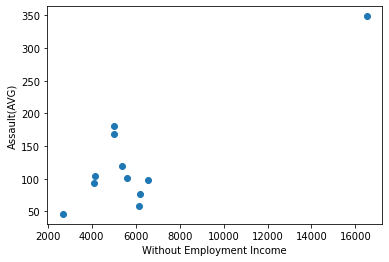

In [ ]:
# Data is plotted
Assault = [119.3,46.3,93.8,348.7,57.7,97.5,168.5,76.7,104.3,180.3,101.7]
no_emp_inc = [5385,2670,4085,16525,6135,6580,5035,6215,4165,5020,5610]

plt.scatter(no_emp_inc, Assault)

plt.ylabel('Assault(AVG)')
plt.xlabel('Without Employment Income')

# Slope is calculated
slope, intercept = np.polyfit(Assault,no_emp_inc,1)
print("Slope = " + str(slope))

# Graph is displayed
plt.show()

#### Data is platted. Can conclude based on this graph that robbery in a neighbourhood increases with the number of people with no education past highschool due to the positive slope.

Slope = 92.45692036963048


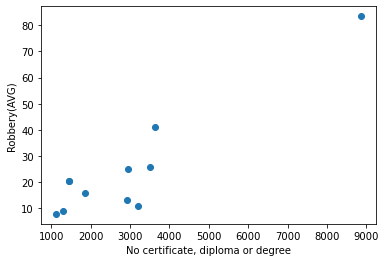

In [ ]:
# Data is plotted
Robbery = [13.2,7.8,20.3,83.5,15.8,11.0,25.0,8.8,25.7,41.2,20.5]
no_edu = [2930,1125,1455,8850,1865,3195,2955,1310,3495,3630,1450]

plt.scatter(tax,break_enter)

plt.ylabel('Robbery(AVG)')
plt.xlabel('No certificate, diploma or degree')

# Slope is calculated
slope, intercept = np.polyfit(Robbery,no_edu,1)
print("Slope = " + str(slope))

# Graph is displayed
plt.show()

#### Compared with total number of police stations near the neighbourhood locations with robbery(avg). The presence of police stations decreases the number of robberies.

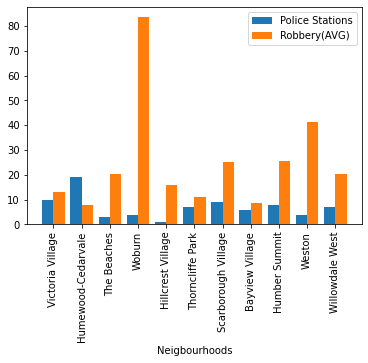

In [ ]:
X = ['Victoria Village', 'Humewood-Cedarvale', 'The Beaches', 'Woburn', 'Hillcrest Village', 'Thorncliffe Park', 'Scarborough Village', 'Bayview Village', 'Humber Summit', 'Weston', 'Willowdale West']

Ypolice = [10,19,3,4,1,7,9,6,8,4,7]
ZRobbery = [13.2,7.8,20.3,83.5,15.8,11.0,25.0,8.8,25.7,41.2,20.5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ypolice, 0.4, label = 'Police Stations')
plt.bar(X_axis + 0.2, ZRobbery, 0.4, label = 'Robbery(AVG)')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Neigbourhoods")
plt.legend()
plt.show()

#### Compared with total number of police stations near the neighbourhood locations with assault(avg). The presence of police stations decreases the number of assaults.

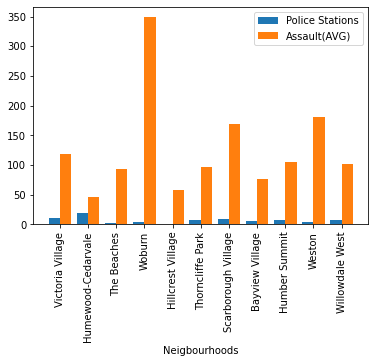

In [ ]:
X = ['Victoria Village', 'Humewood-Cedarvale', 'The Beaches', 'Woburn', 'Hillcrest Village', 'Thorncliffe Park', 'Scarborough Village', 'Bayview Village', 'Humber Summit', 'Weston', 'Willowdale West']

Ypolice = [10,19,3,4,1,7,9,6,8,4,7]
ZAssault = [119.3,46.3,93.8,348.7,57.7,97.5,168.5,76.7,104.3,180.3,101.7]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ypolice, 0.4, label = 'Police Stations')
plt.bar(X_axis + 0.2, ZAssault, 0.4, label = 'Assault(AVG)')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Neigbourhoods")
plt.legend()
plt.show()

#### Map is created displaying the neigbourhoods

In [ ]:
# Map is created centred on Toronto
toronto_map = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# The markers are placed using the latitudes and longitudes
for lat,lng,borough,hood in zip(df8['Latitude'], df8['Longitude'], df8['Borough'], df8['Neighbourhood']):
    label = '{}, {}'.format(hood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(toronto_map)

# Map is displayed    
toronto_map    

## 6. Clustering

#### Data is clustered using boroughs

In [ ]:
# Total of 5 clusters are intialized
k=5

# Dataframe is copied
toronto_clustering = df8

# Data is clustered using borough
kmeans = KMeans(n_clusters = k).fit(pd.get_dummies(toronto_clustering[["Borough"]]))

# Label with clusters is created
df8.insert(0,'Cluster Labels', kmeans.labels_)
df8.columns = df8.columns.str.replace(' ','_')

# Data frame is displayed
df8.head()

,Cluster_Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude,Total_Police_Stations(5000m_radius),Population,__Without_employment_income,Assault_AVG,Robbery_AVG,"__No_certificate,_diploma_or_degree"
0,0,M4A,North York,Victoria Village,43.725882,-79.315572,10,17510,"5,385",119.3,13.2,2930
1,2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,19,14365,"2,670",46.3,7.8,1125
2,4,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,21567,"4,085",93.8,20.3,1455
3,1,M1G,Scarborough,Woburn,43.770992,-79.216917,4,53485,"16,525",384.7,83.5,8850
4,0,M2H,North York,Hillcrest Village,43.803762,-79.363452,1,16934,"6,135",57.7,15.8,1865


In [ ]:
# Map to display clusters is created
clusters_map = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# This is used to associate a unique color with each cluster
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []

# The locations are added using the latitude and longitudes, each cluster is identified with a color and label
for lat, lon, hood, cluster in zip(df8['Latitude'], df8['Longitude'], df8['Neighbourhood'], df8['Cluster_Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(clusters_map)

# Map is displayed    
clusters_map    